<a href="https://colab.research.google.com/github/ShoyniMazumdar/Python/blob/main/Analyzing_the_Growth_of_Indian_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lets Understand some of the most Interesting Patterns of Funding and Startups.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

In [ ]:
# lets import the data
import pandas as pd
data = pd.read_csv("/content/startup_funding.csv")

# changing the names of the columns inside the data
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

# lets clean the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")
    
# lets check the head of the data
data.head()

In [ ]:
import plotly.express as px # Plotly
px.scatter(data,x='City',y='AmountInUSD')

In [ ]:
data.groupby('City').count() # Groupby

,SNo,Date,StartupName,IndustryVertical,SubVertical,InvestorsName,InvestmentType,AmountInUSD,Remarks
City,,,,,,,,,
Agra,2,2,2,2,2,2,2,0,0
Ahemadabad,2,2,2,2,2,1,2,2,0
Ahemdabad,1,1,1,1,1,1,1,0,0
Ahmedabad,38,38,38,38,28,38,38,27,2
Amritsar,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
\\xc2\\xa0Bangalore,1,1,1,1,0,1,1,1,0
\\xc2\\xa0Gurgaon,4,4,4,4,0,4,4,4,1
\\xc2\\xa0Mumbai,1,1,1,1,0,1,1,1,1


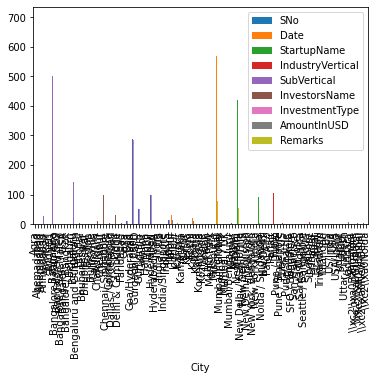

In [ ]:
data.groupby('City').count().plot(kind='bar') # Groupby # BarGraph

In [ ]:
total = data.isnull().sum().sort_values(ascending = False) # Adding all the null values from descending order
print(total)

Remarks             2625
AmountInUSD          960
SubVertical          936
City                 180
IndustryVertical     171
InvestorsName         24
InvestmentType         4
SNo                    0
Date                   0
StartupName            0
dtype: int64


In [ ]:
# checking the column names of the data
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

## Data Cleaning

In [ ]:
# missing data 

# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

# lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending = False)

# lets calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

# lets check the head of the data
missing_data


,Total,Percent %
Remarks,2625,86.235217
AmountInUSD,960,31.537451
SubVertical,936,30.749014
City,180,5.913272
IndustryVertical,171,5.617608
InvestorsName,24,0.788436
InvestmentType,4,0.131406
SNo,0,0.000000
Date,0,0.000000
StartupName,0,0.000000


In [ ]:
total

Remarks             2625
AmountInUSD          960
SubVertical          936
City                 180
IndustryVertical     171
InvestorsName         24
InvestmentType         4
SNo                    0
Date                   0
StartupName            0
dtype: int64

In [ ]:
# lets check the values in the Remarks column
data['Remarks'].value_counts()

Series A                             175
Series B                              63
Pre-Series A                          37
Series C                              28
Series D                              11
                                    ... 
Pre Series-A                           1
QPrize Contest Winners                 1
pre-series A                           1
Personal Investment                    1
Strategic Funding, Minority stake      1
Name: Remarks, Length: 72, dtype: int64

In [ ]:
# lets remove Remarks column, as it contains a lot of nans, and high cardinal column

data = data.drop(['Remarks'], axis = 1)

# lets check the column names after removing the Remarks Column, as it having 
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [ ]:
## Cleaning the dates

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [ ]:
import ipywidgets # univariate and bivariate analysis
from ipywidgets import interact, interact_manual
import plotly.express as px
import seaborn as sns

In [ ]:
 #Bivariate Analysis
@interact_manual
def uni(x=list(data.select_dtypes('object').columns[1:])):
  sns.countplot(data[x])

interactive(children=(Dropdown(description='x', options=('StartupName', 'IndustryVertical', 'SubVertical', 'Ci…

## How Does the Funding Ecosystem changes with respect to Time?

In [ ]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values
import pandas as plt
# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
                                    format='%dd/%mm/%YY').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

ValueError: ignored

## What is the General Amount that Startups get in India?

In [ ]:
# lets check the Maximum funding of a startup
print("Maximum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().max())

In [ ]:
# lets check the startups with more than 50crore+ funding

@interact
def check(column = 'AmountInUSD', x = 500000000): # 50 crore funding of startups
    return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

In [ ]:
# lets check out different ventures of Paytm
data[data.StartupName == 'Paytm']

In [ ]:
# lets check out different ventures of Flipkart
data[data.StartupName == 'Flipkart']

In [ ]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().min())

In [ ]:
# lets check the startups with least funding
data[['AmountInUSD','StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(5)

In [ ]:
data[data['AmountInUSD'] == -999.0].shape

In [ ]:
# Average Funding
print("On Average indian startups got funding of : ", data["AmountInUSD"].dropna().sort_values().mean())

In [ ]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

In [ ]:
# lets analyze the Industry of the Startups

# data cleaning
data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')

industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

In [ ]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

## Does Location also play a role, In determining the Growth of a Startup?

In [ ]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
data['City'] = data['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = data['City'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'copper')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

In [ ]:
# lets analyze the investors on startups

# lets clean the dataset
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = data['InvestorsName'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## What are the different Types of Funding for Startups?

In [ ]:
# lets analyze the investment
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()